#📊 Deep Dive: Evaluation Metrics in Machine Learning

How do we know if our AI is actually "smart" or just guessing? In this notebook, we explore the math and logic behind the most important metrics used in Regression and Classification.

##🛠️ Step 0: Setup

We'll generate some dummy data to play with. Hit "Play"!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

def plot_regression_errors(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted')
    for i in range(len(y_true)):
        plt.plot([i, i], [y_true[i], y_pred[i]], color='gray', linestyle='--', alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

print("✅ Setup complete!")

✅ Setup complete!


##📈 Section 1: Regression Metrics (Predicting Numbers)

When we predict numbers (like House Prices or Fuel Efficiency), we want to measure how "far off" we are from the truth.

**1. Mean Absolute Error (MAE)**

The average of the absolute differences between predictions and actual values.


$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$


**2. Mean Squared Error (MSE)**

Squaring the errors makes large mistakes hurt more.


$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**3. Root Mean Squared Error (RMSE)**

The square root of MSE, bringing the units back to the original scale.


$$RMSE = \sqrt{MSE}$$

**4. R-Squared ($R^2$)**

The "Goodness of Fit." How much of the variance in data does our model explain? 1.0 is perfect.


$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

###📝 Your Task:

Calculate the metrics for the given data.


MAE: 38.0
MSE: 4580.0
RMSE: 67.68
R2 Score: 0.0840


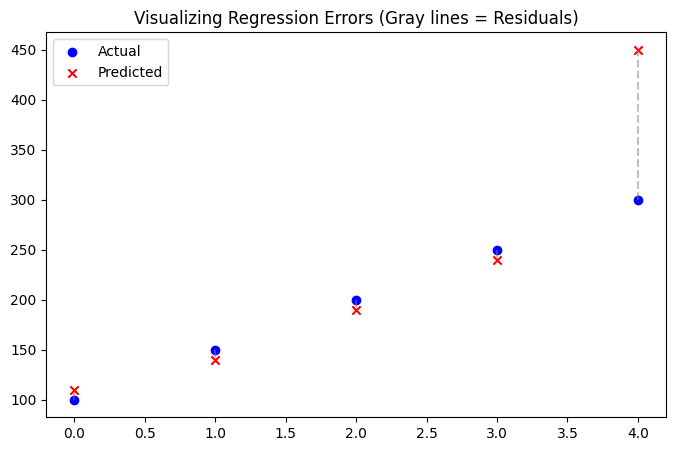

In [ ]:
# Actual House Prices vs Predicted
y_true = np.array([100, 150, 200, 250, 300])
y_pred = np.array([110, 140, 190, 240, 450]) # Note the big error at the end!

# TODO: Calculate metrics using sklearn functions
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

plot_regression_errors(y_true, y_pred, "Visualizing Regression Errors (Gray lines = Residuals)")

##🎯 Section 2: Classification Metrics (Predicting Categories)

Classification isn't about "how far"; it's about "Right vs Wrong."

**1. The Confusion Matrix**

The foundation of all classification metrics.

* **TP (True Positive)**: Predicted Yes, Actual Yes.

* **TN (True Negative)**: Predicted No, Actual No.

* **FP (False Positive)**: Predicted Yes, Actual No. (**Type I Error**)

* **FN (False Negative)**: Predicted No, Actual Yes. (**Type II Error**)

**2. Accuracy**

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$


*⚠️ Warning: Accuracy is misleading if your data is imbalanced (e.g., 99% are NOT traffic signs).*

**3. Precision vs Recall**

* **Precision:** "Of all I said were positive, how many were actually positive?"


$$Precision = \frac{TP}{TP + FP}$$

* **Recall**: "Of all that were actually positive, how many did I find?"


$$Recall = \frac{TP}{TP + FN}$$

🌟 **4. The F1-Score (The MVP)**

The F1-score is the **Harmonic Mean** of Precision and Recall. It is the best metric when you need a balance between the two, especially with imbalanced data.


$$F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

### 📝 Your Task:

Imagine an AI trying to detect a "Stop Sign."

* Total images: 100

* Actual Stop Signs: 20

* AI predicted 15 Stop Signs.

* Out of those 15, only 10 were actually Stop Signs.

Precision: 0.67
Recall: 0.50
F1 Score: 0.57


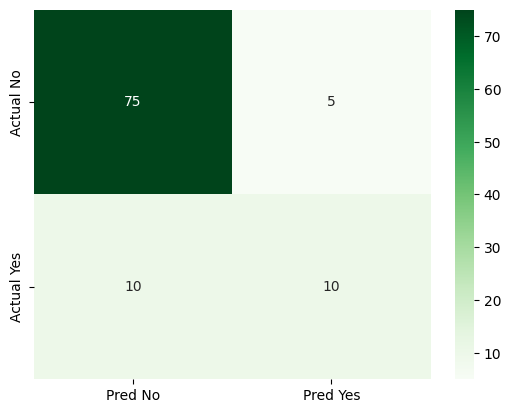

In [ ]:
# Manually define the counts based on the story above
tp = 10
fp = 5  # Predicted Stop, but was actually a tree (15 predicted - 10 actual)
fn = 10 # Actual Stop signs were 20, we only found 10. So we missed 10.
tn = 75 # The rest were correctly identified as 'Not Stop'

# TODO: Calculate Precision, Recall, and F1-Score
precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize the Confusion Matrix
cm = np.array([[tn, fp], [fn, tp]])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Pred No', 'Pred Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.show()

##💡 Final Thought: When to use what?

* **High Precision:** Use when a False Positive is dangerous (e.g., Spam filters—you don't want a job offer in Spam).

* **High Recall:** Use when a False Negative is dangerous (e.g., Cancer detection or Stop Sign detection—you cannot afford to miss one).

* **F1-Score:** Use for most general cases to ensure your model is robust and reliable!

*Created with ❤️ for WiDS Project*